## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load summary metrics file
summary_df = pd.read_csv('../data/derived/performance/summary.csv')

# print unique models, hyperparameters and metrics
print(f'Models          {summary_df["model_name"].unique()}')
print(f'Hyperparameters {summary_df["hyperparameter_name"].unique()}')
print(f'Metrics         {summary_df["metric_name"].unique()}')

# preview dataframe
summary_df.sample(5)

Models          ['decisiontree' 'svc' 'mlp']
Hyperparameters ['maxdepth' 'c' 'alpha']
Metrics         ['true_positives' 'false_positives' 'true_negatives' 'false_negatives'
 'accuracy' 'macro_recall' 'macro_precision' 'macro_f1' 'micro_recall'
 'micro_precision' 'micro_f1' 'binary_recall' 'binary_precision'
 'binary_f1']


,model_name,dataset_name,vector_name,hyperparameter_name,hyperparameter_value,metric_name,metric_value
205,decisiontree,dev,count,maxdepth,10,micro_precision,0.849246
842,svc,train,count,c,0.1,true_negatives,3783.000000
683,mlp,train,tfidf,alpha,0.01,binary_recall,1.000000
51,svc,dev,count,c,0.1,micro_precision,0.903087
309,svc,dev,tfidf,c,0.25,false_positives,60.000000


## Visualize performance with line plots

In [3]:
def visualize_model_metric(summary_df, metric_name, model_name):
    
    # copy summary dataframe
    df = summary_df.copy()
    
    # filter dataframe to metric and model
    df = df[df['metric_name'] == metric_name]
    df = df[df['model_name']  == model_name]
    
    # reset indices
    df.reset_index(inplace=True, drop=True)
        
    # get hyperparameter name (assumes only one hyperparameter name per model)
    hyperparameter_name = df['hyperparameter_name'][0]
    
    # sort dataframe by vector name
    df.sort_values(by='vector_name', inplace=True)
    
    # sort dataframe by ascending hyperparameter value
    sorted_idx = np.argsort([float(x) if x.replace('.','',1).isnumeric() else float('inf') for x in df['hyperparameter_value']])
    df = df.iloc[sorted_idx, :]
    
    # set plot style
    sns.set_style("whitegrid")
    
    # plot decision tree performance
    g = sns.relplot(data = df,
                    x = 'hyperparameter_value',
                    y = 'metric_value',
                    hue = 'dataset_name', 
                    col = 'vector_name',
                    kind = 'line')
    
    # adjust labels
    g.set_titles("{col_name} vector")
    g.set_axis_labels(f'{hyperparameter_name}', f'{metric_name}')
    
    # adjust y-axis limit (uses hardcoded numbers)
    g.set(ylim=(0.5, None))
    
    return g

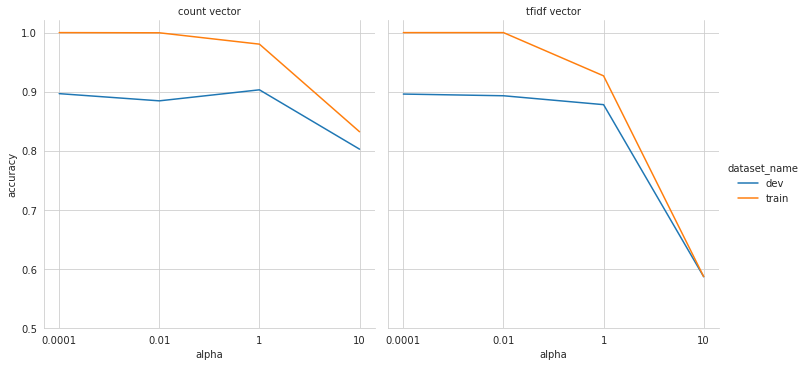

In [4]:
visualize_model_metric(summary_df, 'accuracy', 'mlp')

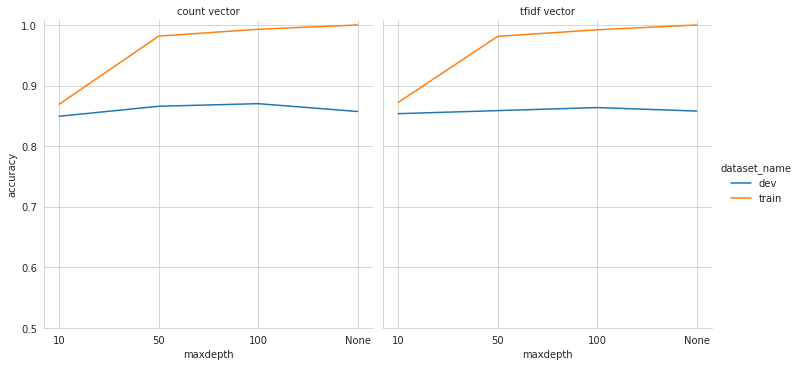

In [5]:
visualize_model_metric(summary_df, 'accuracy', 'decisiontree')

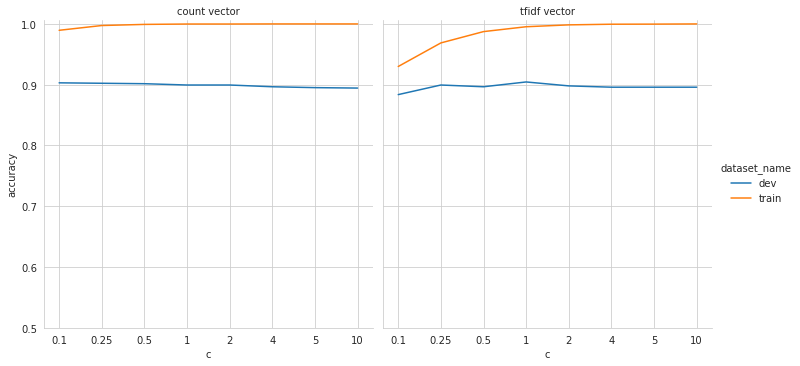

In [6]:
visualize_model_metric(summary_df, 'accuracy', 'svc')